# Introducción

El libro de Leland Wilkinson *The Grammar of Graphics* (1999) es un clásico entre los libros de visualización de datos. En él, Wilkinson propone un framework que unifica el diseño, implementación e interpretación de un gráfico. La *Gramática de los gráficos* se ha hecho especialmente famosa tras su implementación en el paquete de R [ggplot2](http://ggplot2.org/). También existe una versión de este paquete para [Python](http://ggplot.yhathq.com/) que, lamentablemente, es bastante limitada en comparación con la de R. Dado que las sintaxis de *ggplot* son muy similares en ambos lenguajes, en este notebook emplearemos R (de una forma muy transparente, por lo que no hace falta experiencia con este lenguaje). En el apéndice puedes encontrar instrucciones acerca de como usar Jupyter con R.

En esta sesión exploraremos algunos de los conceptos principales que subyacen a esta *Gramática de los gráficos*. Pero, ¿Qué es una *gramática de gráficos*?

Una *Gramática de los gráficos* es una herramienta que permite describir de forma concisa los componenentes de una gráfica. Dicha gramática nos proporciona la posibilidad de superar los gráficos prefabricados (como los que encontramos en Excel) y profundizar en la estructura que subyace a todos los gráficos estadísticos. En la "aproximación Excel" elegimos una tipo de gráfico entre una lista de posibilidades predefinas para representar nuestros datos: ¿Desea usted un *gráfico de barras*, un *gráfico circular* o un *gráfico de líneas*? Lo cierto es que esta forma de construir gráficas no incita a la reflexión. Por otra parte, para comprender la *gramática de los gráficos* tenemos que reflexionar como se construyen las gráficas.

# Introducción a **ggplot** ¿Cómo construir un gráfico?

Hay dos principios fundamentales a tener en cuenta a la hora de intentar construir un gráfico siguiendo la metodología de la *gramática de los gráficos*:

* Gráficos = distintas capas formadas por elementos gramaticales (elemento gramatical = pieza mínima para la construcción de gráficas).
* Los gráficos más utiles se optienen mediante un buen *mapeado estético*

Hay 7 elementos gramaticales en **ggplot**, de los cuáles sólo los tres primeros son imprescindibles:
* Los datos: en el caso de **ggplot**, en formato *data.frame* (o *pandas.DataFrame* en python) .
* Elementos estéticos: los atributos visuales en los que mapearemos los datos.
* Geometrías: Los elementos visuales que emplearemos para representar los datos.
* Facets: Forma de representación que nos permitirá representar subconjuntos de datos.
* Estadísticos: Representaciones estadísticas de los datos.
* Coordenadas: El sistema de coordenadas empleado para la representación de los datos (cartesiano  o polar).
* Anotaciones y temas: Todas las representaciones sin relación directa con los datos (el fondo del gráfico o su título, por ejemplo).

Estos elementos gramaticales se combinan en forma de capas para construir un gráfico. De esta forma, el proceso de construcción de un gráfico básico en **ggplot** se puede resumir como sigue:

* **Mapeamos** cada una de las variables que deseamos representar a algún atributo estético (*aesthetic*, más sobre esto más adelante). Por ejemplo, para hacer un *scatterplot* de A frente a B mapeamos A al atributo "posición en el eje x" y B al atributo "posición en el eje y".  Este proceso puede representarse mediante la creación de otro *data.frame*:

<img src="images/ggmapping.png" style="width: 800px;"/>

* Mediante el mapeado que hemos hecho podemos generar gráficos distintos dependiento del tipo de **geometría** que empleamos para representar los atributos estéticos. Por ejemplo, si dibujamos puntos obtendremos un *scatterplot*, si usamos líneas una *gráfica de líneas* y si usamos barras, un *gráfico de barras*.
* Para crear el gráfico final tenemos que combinar objetos gráficos procedentes de tres fuentes: nuestros datos (cons sus atributos estéticos y geometrías asociadas); las escalas(¿usamos escala logarítmica o no?) y el **sistema de coordenadas** (¿usamos una representación cartesiana o polar?; y las **anotaciones y temas** (como el fondo del gráfico o el título del gráfico). Estos elementos y su combinación para formar el gráfico final pueden verse en la figura siguiente.

<img src="images/grammatic_elements.png" style="width: 800px;"/>

Esta explicación es posiblemente difícil de digerir... veamos un ejemplo con **ggplot** para intentar aclarar ideas. 
Para ilustrar la esencia de construir un gráfico vamos a emplear el dataset [diamonds](http://www.rdocumentation.org/packages/ggplot2/functions/diamonds) incluído en el paquete **ggplot**. Antes de nada cargamos la librería y hacemos los gráficos un poco más pequeños.

In [2]:
library('ggplot2')
options(repr.plot.width=6, repr.plot.height=4)


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Intentemos crear un  *scatterplot* del precio del diamante (*price*) Vs. los quilates (*carat*). Para ello, el primer paso sería crear el mapeado de nuestros **datos** (contenidos en el data.frame *diamonds*) a los atributos estéticos deseados (*prices* al atributo "posición en el eje y" y *carat* al atributo "posición en el eje x"). En **ggplot** esto se indicaría de la siguiente forma: 

In [2]:
# aes es una función que especifica los "aesthetics" del gráfico
p = ggplot(diamonds, aes(x = carat, y = price))


No te preocupes si no aparece ningún gráfico. Hasta el momento, solo hemos construído la primera capa de nuestra gráfica, pero todavía no hemos renderizado nada. Fíjate que es posible almacenar los pasos intermedios en una variable. La siguiente capa que consideraremos será la de **geometrías**. Esta es la última capa necesaria para crear un gráfico (vease la explicación anterior) ya que **ggplot** completará nuestra especificación mediante capas por defecto para completar el *plot*. La geometría adecuada para realizar un *scatterplot* es *geom_point*:

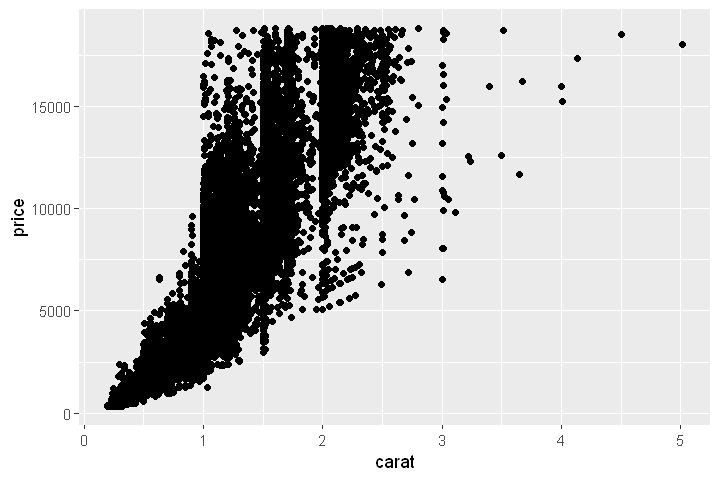

In [3]:
p = p + geom_point()

# Para visualizar el gráfico. Debemos imprimirlo mediante print o simplemente teclear su nombre en la terminal
p

# También podríamos haber escrito
# ggplot(diamonds, aes(x = 'carat', y = 'price')) + geom_point()


### Ejercicio 1: Mapeando datos. 

Uno de los principios de la *gramática de los gráficos* es "Los gráficos más utiles se optienen mediante un buen *mapeado estético*". Efectivamente, podemos añadir más información al gráfico realizando nuevos mapeados. Por ejemplo, podemos emplear los atributos estéticos *color* y *size*. 

**Modifica la gráfica anterior mapeando la variable *cut* a *color* y la variable *depth* a *size***.

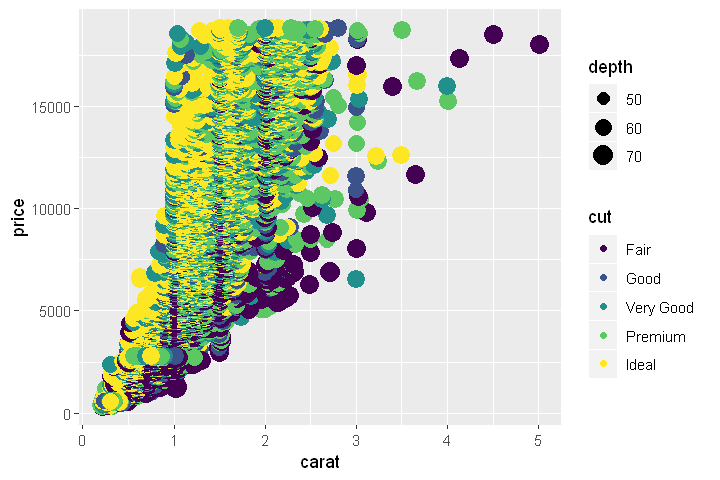

In [4]:
# Escribe la solución, usa el data.frame diamonds
ggplot(diamonds, aes(x = carat, y = price, color=cut, size=depth)) + geom_point()


Una vez completes el ejercicio, fíjate que **ggplot** ha incorporado una leyenda para las variables de color y tamaño de forma automática. Por otra parte, esta gráfica es un claro ejemplo de gráfica en el que hemos incorporado demasiada información. El tamaño de los puntos no permite apreciar de forma efectiva cómo influye *Depth* en  el precio de los diamantes, en gran parte debido a que muchos puntos se solapan. Vamos a intentar mejorar el dibujo en este sentido.

### Ejercicio 2: Atributos.

Para mejorar el gráfico anterior vamos a modificar la forma de los puntos y su transparencia. En los ejemplos anteriores cada elemento estético varía en función de la variable en la cuál había sido mapeado. Lo que pretendemos en este ejercicio es completamente distinto, ya que estableceremos el valor de una variable estética sin mapeo. Para diferenciar estas dos situaciones se habla de propiedades-estéticas (*aesthetics*) y atributos (*attributes*). Para modificar el atributo "forma" podemos usar: 

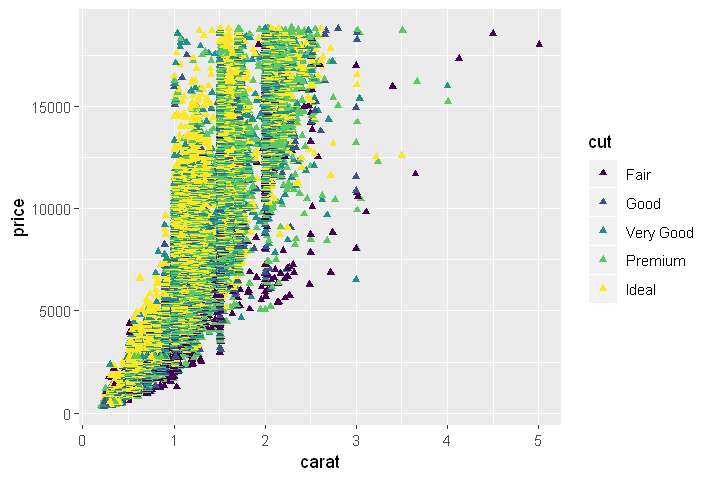

In [5]:
# Ejemplo:
ggplot(diamonds, aes(x = carat, y = price, color=cut)) + geom_point(shape = 17)


Fíjate en que en este caso, *shape* no está incluído dentro de la función *aes*. Como consecuencia, *shape* no ha sido incluída en la leyenda.

**Modifica el plot anterior estableciendo el valor del atributo tamaño (*size*) a 1 y el valor de la transparencia (*alpha*) a 0.2. Es una buena práctica el uso de transparencia cuando hay solapamiento (overplotting)**

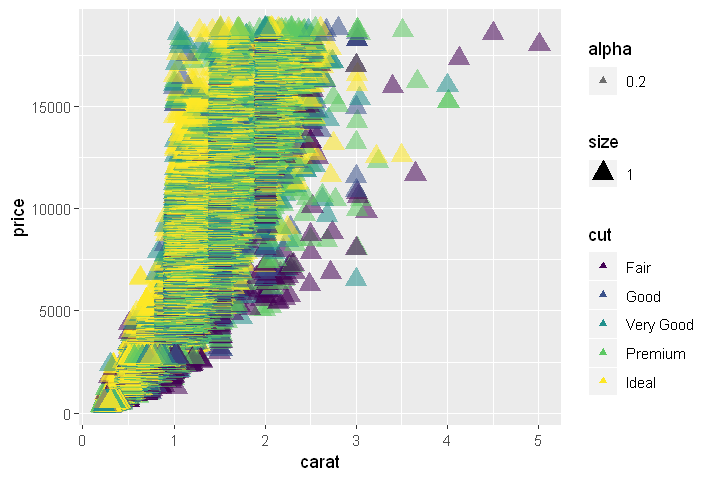

In [6]:
# Escribe la solución, usa el data.frame diamonds
ggplot(diamonds, aes(x = carat, y = price, color=cut, size=1, alpha=0.2)) + geom_point(shape = 17)


**Comentario:**

A pesa de haber incluido transparencia, es bastante difícil ver la posición de los diferentes triángulos debido tanto a su forma como a su tamaño. Para que la gráfica fuese más fácil de interpretar sería más fácil dejarlos como puntos y con un tamaño menor.

### Ejercicio 3: Más geometrías

Para terminar con esta primera parte de la práctica vamos repasar los mapeos y a explorar nuevas geometrías mediante el *data.frame meat*, que contiene datos acerca del consumo de diversos tipos de carne en Estados Unidos. Para leerlo empleamos la función *read.csv*, especificando el formato de cada una de las columnas:

In [7]:
meat = read.csv('data/meat.csv', colClasses = c('Date', rep( 'numeric', 7)))
print(head(meat))


        date beef veal pork lamb_and_mutton broilers other_chicken turkey
1 1944-01-01  751   85 1280              89       NA            NA     NA
2 1944-02-01  713   77 1169              72       NA            NA     NA
3 1944-03-01  741   90 1128              75       NA            NA     NA
4 1944-04-01  650   89  978              66       NA            NA     NA
5 1944-05-01  681  106 1029              78       NA            NA     NA
6 1944-06-01  658  125  962              79       NA            NA     NA


**Crea un gráfico temporal para el consumo de carne vacuna (*beef*) usando la geometría geom_line. Guarda el resultado en una variable auxiliar.**

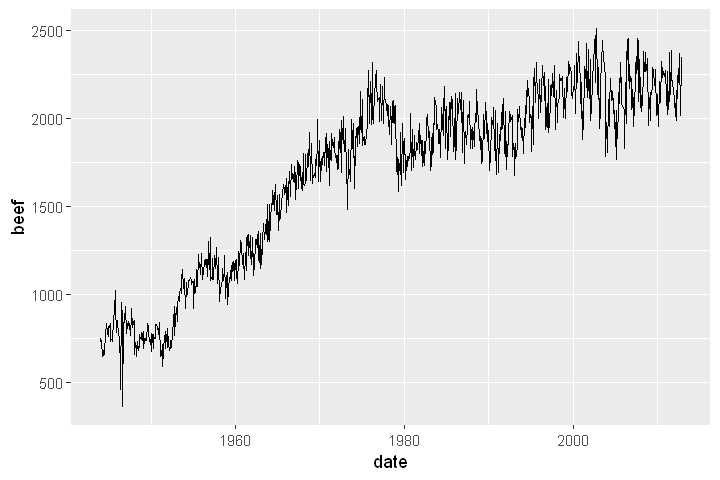

In [8]:
# Escribe aquí la solución, usa el data.frame mean y la geometría geom_line
meat_plot = ggplot(meat, aes(x=date, y=beef)) + geom_line()
meat_plot


Es posible insertar varias capas con distintas geometrías o incluso estadísticos. 

**Por ejemplo, usando la variable auxiliar creada en el anterior snippet, añade a la serie temporal un *scatterplot* de los datos (con *geom_point()*) y una regresión (con *geom_smooth*)**:

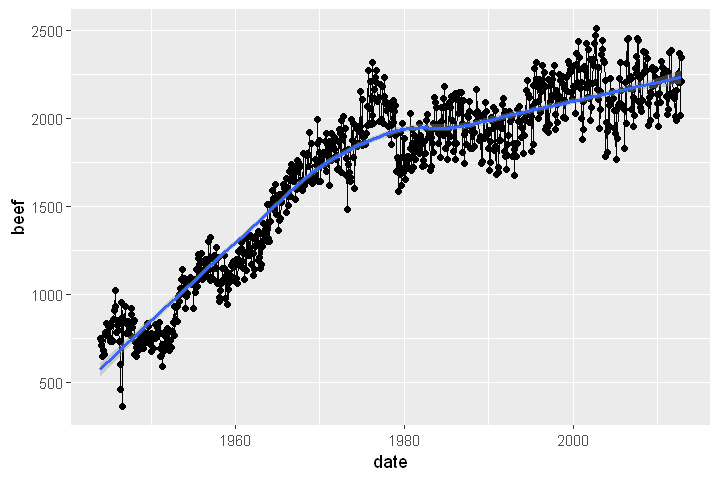

In [9]:
# Escribe aquí la solución
meat_plot + geom_point() + geom_smooth(method='loess')


**Cambia los atributos color de la regresión ('red') y el grosor de la línea (parámetro *size*, con valor 0.5)**. Recuerda que no debes usar la función *aes* ya que no estamos trabajando con *aesthetics*.

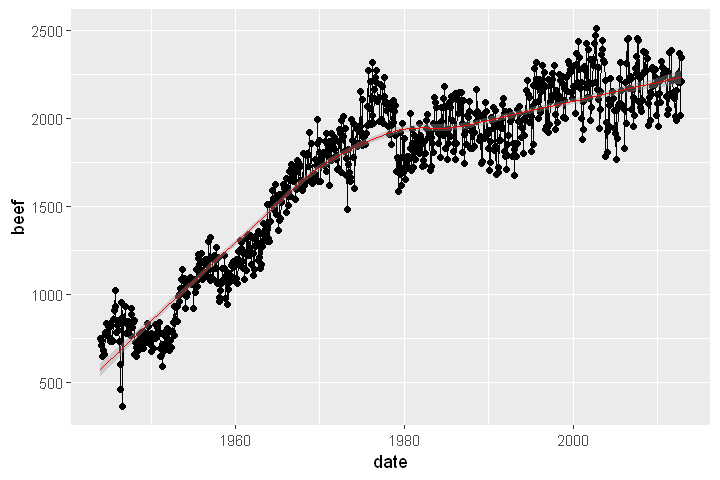

In [10]:
# Escribe aquí la solución
meat_plot + geom_point() + geom_smooth(method='loess', color='red', size=0.5)


### Ejercicio 4: 

Por defecto, *geom_smooth* usa [regresión local (o loess)](https://en.wikipedia.org/wiki/Local_regression) para obtener la regresión. La cantidad de puntos locales empleados en la regresión se puede controlar con el parámetro *span*. 

**Modifica el parámetro *span* para observar cómo afecta a la regresión. Elimina el intervalo de confianza poniendo el parámetro *se* a *FALSE***.

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"k-d tree limited by memory. ncmax= 827"

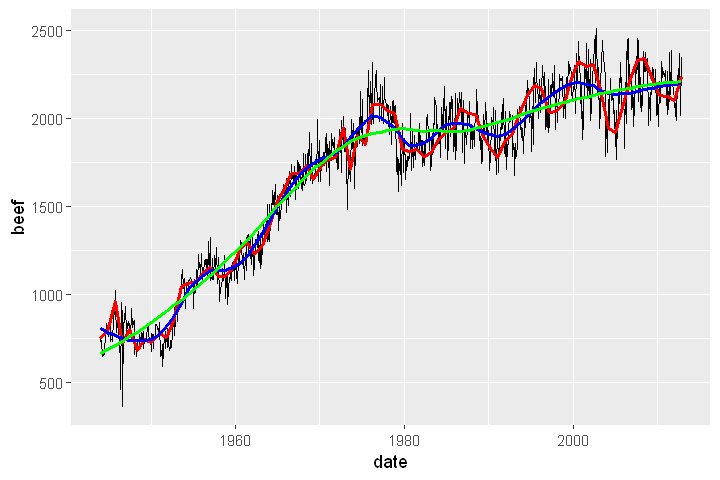

In [11]:
# Escribe aquí la solución
meat_plot + 
    geom_smooth(method='loess', color='red', span=0.01, se=FALSE) + 
    geom_smooth(method='loess', color='blue', span=0.2, se=FALSE) + 
    geom_smooth(method='loess', color='green', span=0.6, se=FALSE)


**Comentario**:

Según este método de regresión lineal, los subconjuntos de datos utilizados para el ajuste por mínimos cuadrados ponderados están determinados por un parámetro de suavización que define el ancho de banda. El argumento *span* controla este parámetro de suavización. El valor de *span* es la proporción de los datos utilizados en cada ajuste.

A *span* se le llama parámetro de suavización porque controla la flexibilidad de la función de regresión. Valores grandes de *span* (toma valores en el rango de 0 a 1) producen curvas suaves; valores pequeños pueden provocar que la curva se ajuste demasiado a los datos y se produzca un sobreajuste.

# La capa de los datos

Imaginemos que deseamos dibujar el consumo de los distintos tipos de carne presentes en el *data.frame* *meat* a lo largo del tiempo. La forma *naive* que a muchos de nosotros se nos ocurriría realizar este tipo de plot explota el hecho de que podemos sobreescribir los mapeos realizados anteriormente en las distintas capas que componen el gráfico:

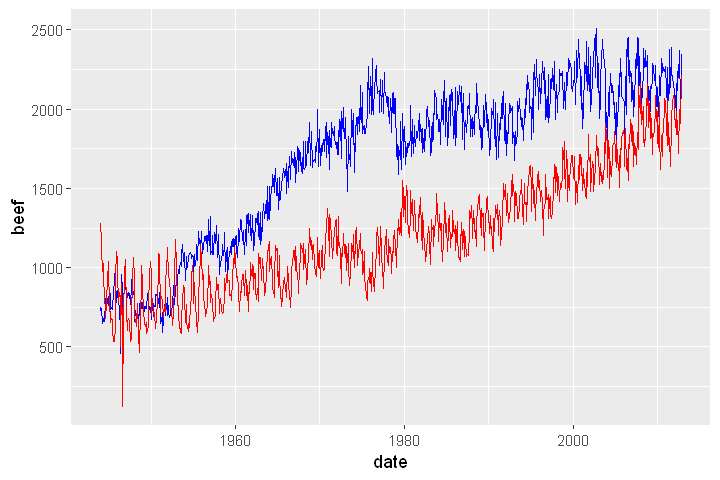

In [12]:
ggplot(meat, aes(x=date, y = beef)) + geom_line(color = 'blue') + geom_line(aes(x=date, y = pork), color = 'red') 

### etc. ¡Aun quedan muchos tipos de carne! :'(


Además de ser muy poco práctico (aún tendríamos que añadir las capas correspondientes a los restantes tipos de carne) esta es una forma incorrecta de realizar el gráfico (al menos desde la filosofía de la *gramática de los gráficos*). Las variables que hemos dibujado en el eje *y* han sido:

1. Consumo de carne vacuna.
2. Consumo de carne de cerdo.

Así pues lo que realmente queremos dibujar en el eje *y* es *consumo de carne*. ¡Esto implica que nuestra capa de datos no está en formato apropiado para lo que deseamos representar y estudiar! Este es un problema que suele presentarse a menudo estrechamente relacionado con dos formas de presentar los datos en formato tabular: [long vs wide](https://en.wikipedia.org/wiki/Wide_and_narrow_data). En el caso que nos ocupa, un *data.frame* adecuado a nuestros intereses tendría el formato:


| date       | meat_type | consumption |
|------------|-----------|-------------|
| 1944-01-01 | beef      | 751         |
| 1944-02-01 | beef      | 13          |
| ...        | ...       | ...         |
| 1944-01-01 | veal      | 85          | 



Para pasar entre formatos *wide* y *long* podemos emplear la librería de R *reshape2*. En este [link](http://seananderson.ca/2013/10/19/reshape.html) puedes encontrar más información sobre *reshape2* y los formatos *long* y *wide*. Para pasar a formato long, simplemente debemos usar:


In [13]:
library('reshape2')

meat_long = melt(meat, id.vars = 'date')
colnames(meat_long) = c('date', 'meat_type', 'consumption')

head(meat_long)


date,meat_type,consumption
1944-01-01,beef,751
1944-02-01,beef,713
1944-03-01,beef,741
1944-04-01,beef,650
1944-05-01,beef,681
1944-06-01,beef,658


### Ejercicio 5:

**Usando la nueva tabla, crea un gráfico mostrando el consumo de los distintos tipos de carnes a lo largo del tiempo. Mapea cada tipo de carne con un color distinto.**

Warning message:
"Removed 1068 rows containing missing values (geom_path)."

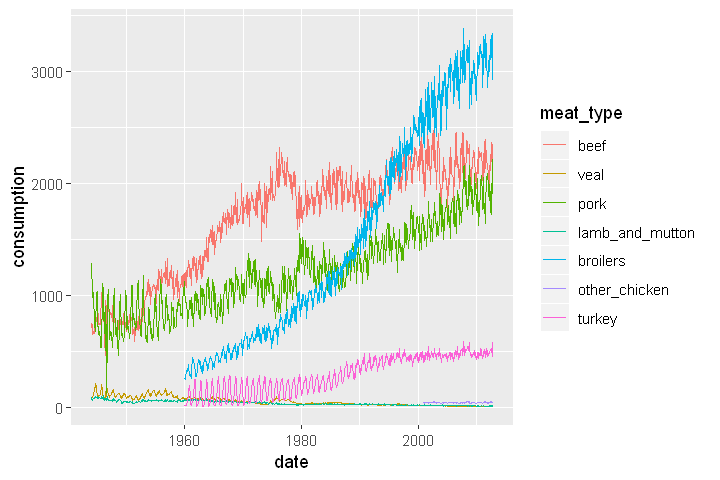

In [14]:
# Escribe aquí la solución
meat_plot = ggplot(meat_long, aes(x=date, y=consumption, color=meat_type)) + geom_line()
meat_plot


Una vez completes el ejercicio observa que, a diferencia de nuestro gráfico anterior, esta vez aparece una leyenda (¡una buena señal de que lo estamos haciendo bien!). Una vez creado el gráfico, **guardalo en una variable auxiliar y luego modifícala añadiendo un *geom_smooth*. Observa que ggplot crea una regresión para cada tipo de carne. Mejora el gráfico eliminando los intervalos de confianza.**

Warning message:
"Removed 1068 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1068 rows containing missing values (geom_path)."

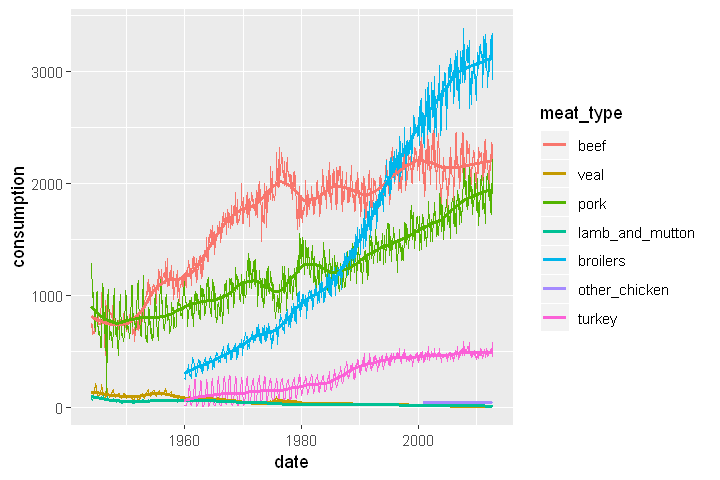

In [15]:
# Escribe aquí la solución
meat_plot + geom_smooth(method='loess', size=1, span=0.2, se=FALSE)


# Geometrías

Ya hemos trabajado un poco con distintas geometrías como *geom_point* o *geom_line*. En esta sección estudiaremos algunos problemas que pueden surgir con estas geometrías y exploraremos algunas nuevas.

## *Scatterplots*

En esta sección vamos a explorar el dataset *Vocab*, que os facilitamos en formato csv. Este dataset continene información acerca de los años de educación recibidos y una puntuación (un número entero) en un test de vocabulario realizado con más de 21,000 individuos en Estados Unidos durante 1972-2004. Importamos el dataset haciendo uso de la función *read.csv*:

In [3]:
vocab = read.csv('data/vocab.csv', colClasses=c('numeric', 'character', 'numeric', 'numeric'))
head(vocab)


year,sex,education,vocabulary
2004,Female,9,3
2004,Female,14,6
2004,Male,14,9
2004,Female,17,8
2004,Male,14,1
2004,Male,14,7


### Ejercicio 6:

**Dibuja un *scatterplot* de la puntuación en el test (*vocabulary*) en función del número de años de estudios (*education*). ¿Observas algún problema en la representación?**

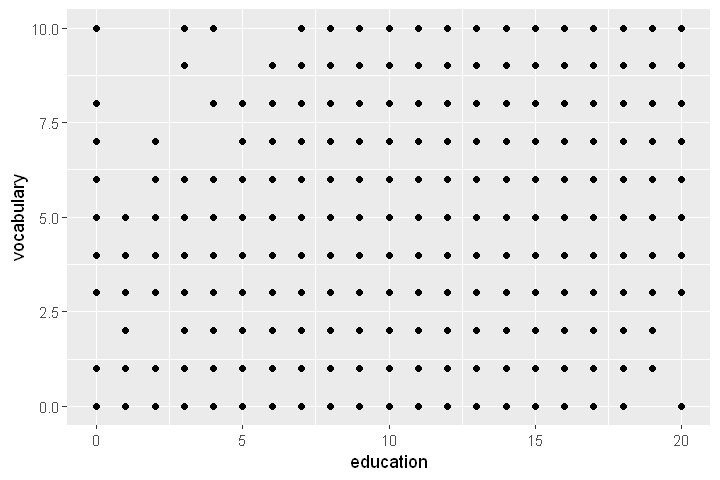

In [17]:
# Escribe aquí la solución, usa el dataset vocab
ggplot(vocab, aes(x=education, y=vocabulary)) + geom_point()


Es obvio que tenemos un problema de *overplotting* debido a que las puntuaciones son números enteros. En este caso, no podemos solucionar el *overplotting* mediante el uso de transparencia. Lo que sí podemos hacer es intentar modificar levemente la posición de cada punto añadiendo un poco de ruido. A este procedimiento se le conoce como **jittering**.  Afortunadamente, al igual que podemos modificar el color o la forma de un punto, ggplot también nos permite modificar la posición de algunas geometrías mediante el atributo *position*.

### Ejercicio 7:


**Modifica el *plot* anterior añadiéndole *jittering*. Para ello establece el atributo *position='jitter'* dentro  de *geom_point*.  Con *jittering* sí tiene sentido aplicar transparencia,  así que añade una poca.**

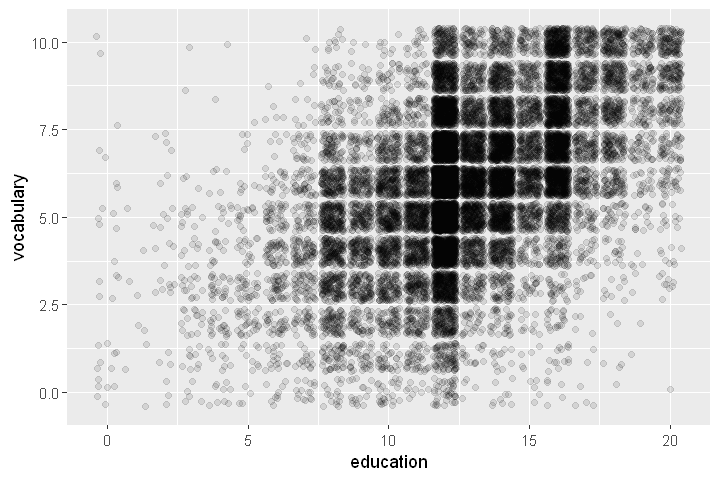

In [18]:
# Escribe aquí la solución, usa el dataset vocab
ggplot(vocab, aes(x=education, y=vocabulary)) + geom_point(position='jitter', alpha=0.1)


Con el último *plot* podemos hacernos una idea de la posible relación existente entre *vocabulary* y *education*: ¡parece que la puntuación obtenida aumenta con los años de educación!

### Ejercicio 8:

**Confirma que los años de educación aumentan (en término medio) la puntuación de los alumnos añadiendo una regresión a la gráfica anterior (*geom_smooth*). Usa el atributo *method* para  especificar que quieres hacer una regresión lineal ('lm').**

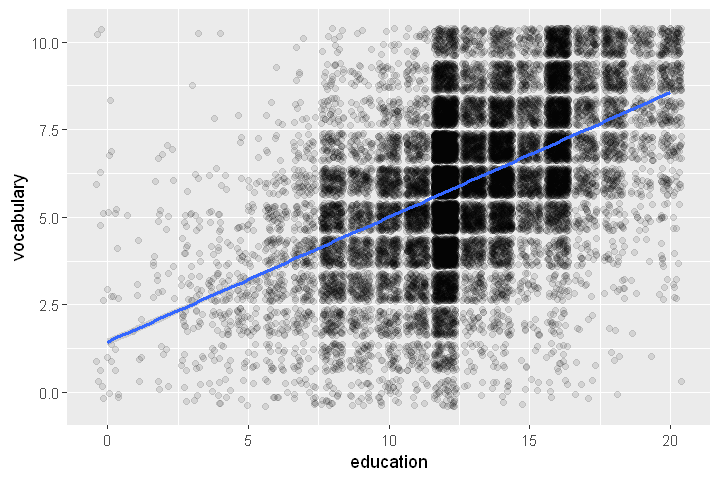

In [19]:
# Escribe aquí la solución
ggplot(vocab, aes(x=education, y=vocabulary)) + 
    geom_point(position='jitter', alpha=0.1) + 
    geom_smooth(method='lm')


¡Una buena gráfica puede ser la mejor guía para sacar el máximo partido a los datos!

## Histogramas y gráficos de barras

El uso más habitual de la geometría tipo *barra* es la creación de histogramas. Dado que uno de los elementos gramaticales de **ggplot** son los estadísticos (es decir, que **ggplot** puede calcular los estadísticos más comunes por nosotros), realizar un histograma es muy sencillo. El único elemento estético a especificar es *x*: la variable de la que queremos construir el histograma. Por ejemplo, podemos crear un histograma para la variable 'education' mediante el comando:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


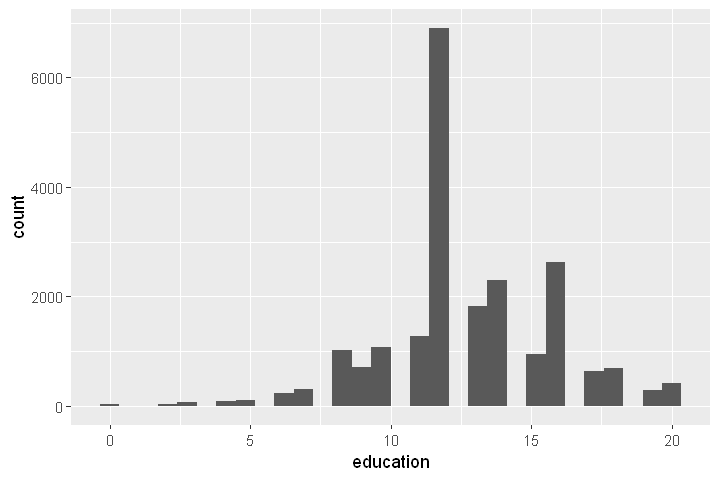

In [20]:
ggplot(vocab, aes(x=education)) + geom_histogram()


### Ejercicio 9: 

**El histograma anterior sugiere una distribución de edades  un tanto extraña. ¿Realmente existen edades para los que no existan datos? Si no es así, ¿A que pueden deberse los huecos del histograma?**

¡¡Recuerda que cualquier gráfica debe ir acompañada de un pensamiento crítico y reflexivo sobre lo que estamos viendo!!

**Contestación:**

Si consultamos brevemente los datos de nuestro DataFrame vemos que no existen edades para las que no existen datos, por lo que esta no es la causa de los huecos en el histograma. Consultando la documentación de la librería `ggplot2` establece por defecto para la función `geom_histogram()` un valor para el número de *bins* igual a 30. Es por esto por lo que hay huecos en el histograma, porque algunos de los *bins* generados, al haber más *bins* que edades en el DataFrame, no contienen ninguna edad.

Esto lo podemos arreglar declarando el valor para el argumento *bins*.

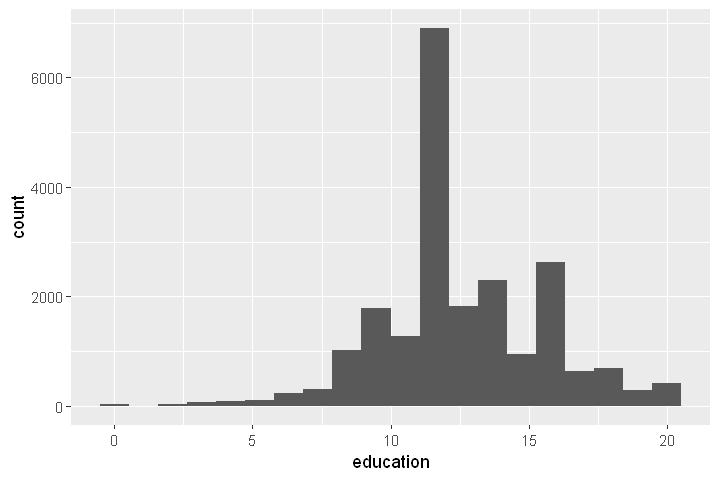

In [21]:
# Intenta solucionar el ejercicio antes de seguir leyendo.
# No tienes porque usar código si crees que no es necesario.

# Obtenemos los valores máximos y mínimos
max_education = max(vocab$education)
min_education = min(vocab$education)

# Establecemos un bin para cada uno de los años
ggplot(vocab, aes(x=education)) + geom_histogram(bins=(max_education - min_education))


### Ejercicio 10:

**Compruebe si se puede obtener un histograma mejor eligiendo otro tamaño para los bins. Tras observar los datos que queremos reprensentar ¿Cuál es la mejor elección para *binwidth*?**

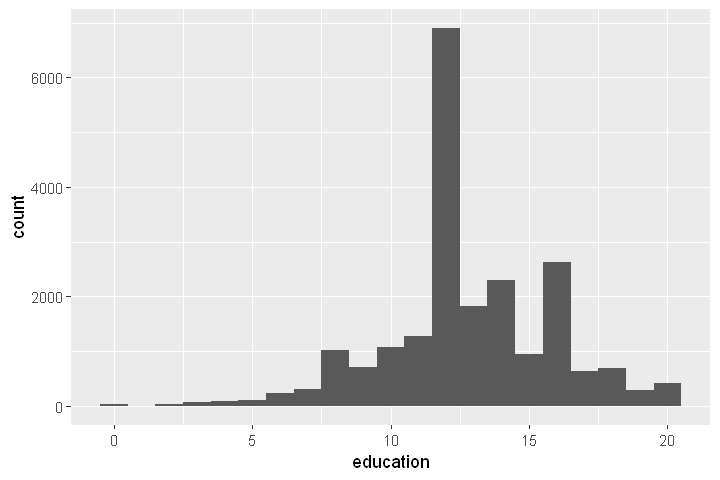

In [22]:
# Escribe aquí la solución

# Establecemos un bin para cada uno de los años
ggplot(vocab, aes(x=education)) + geom_histogram(binwidth=1)


**Contestación:**

Como los datos que queremos con este histograma es la frecuencia de aparición de cada uno de los años (números enteros) presentes en la educación escolar del grupo de alumnos presnetes en los datos, lo mejor será usar un *binwidth* igual a uno para que cada uno de los años tenga su propia barra de frecuencia.

### Ejercicio 11:

**Crea una representación de la función de densidad especificando como atributo estético *y=..density..*. Compara el gráfico actual con el histograma que realizamos al principio de la sección.**

En este caso *y=..density..* esta pidiendo a ggplot que construya un nuevo mapping-estético con los valores normalizados del histograma, y que emplee dicho atributo en la representación.

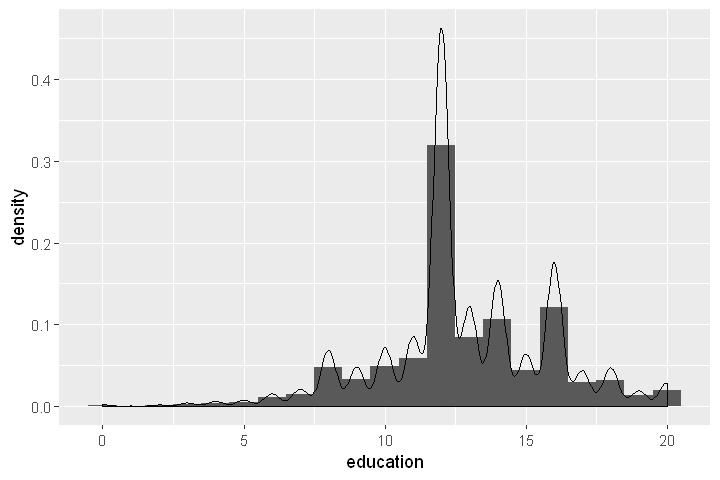

In [4]:
# Escribe aquí la solución
ggplot(vocab, aes(x=education, y=..density..)) + 
    geom_histogram(binwidth=1) +
    geom_density() 


**Contestación:**

El gráfico que podemos ver aquí es similar al que aparece al principio de la sección, aunque con el *binwidth* adecuado. Difieren en que en este gráfico se puede observar la función de densidad de probabilidad para la variable en lugar de la frecuencia de aparición de cada una de las edades en el DataFrame.

### Ejercicio 12: 

**Volvamos al histograma original (con el *bindwidth* adecuado). Modifica el código para obtener dos histogramas coloreados por sexo (utiliza el atributo 'fill').  ¿Existe algún problema perceptual en el gráfico?**

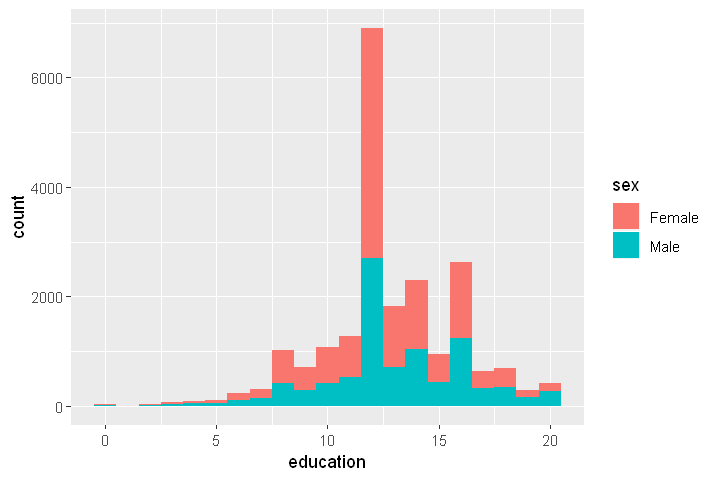

In [24]:
# Escribe aquí la solución
ggplot(vocab, aes(x=education, fill=sex)) + geom_histogram(binwidth=1)


**Contestación:**

El problema que presenta este gráfico es que no queda muy claro si las barras se están apilando las del sexo femenino sobre el sexo masculino o si, en su lugar, las barras se solapan unas encima de otras pero las del sexo femenino son más altas y por eso sobresalen.

Sí que existe un problema perceptual en el gráfico anterior: ¡no está claro si las barras están apiladas o no! Evidentemente, deberíamos evitar cualquier ambigüedad en nuestros gráficos. Por defecto los gráficos están apilados, aunque no es obvio. Afortunadamente, existen modificadores de posición para los gráficos de barra (recuerda el modificador **jitter** de geom_point). **Prueba las distintas opciones para *position* y usa la más adecuada para representar los dos histogramas**. Las posibles opciones son 'identity', 'jitter', 'dodge', 'stack' y 'fill'.

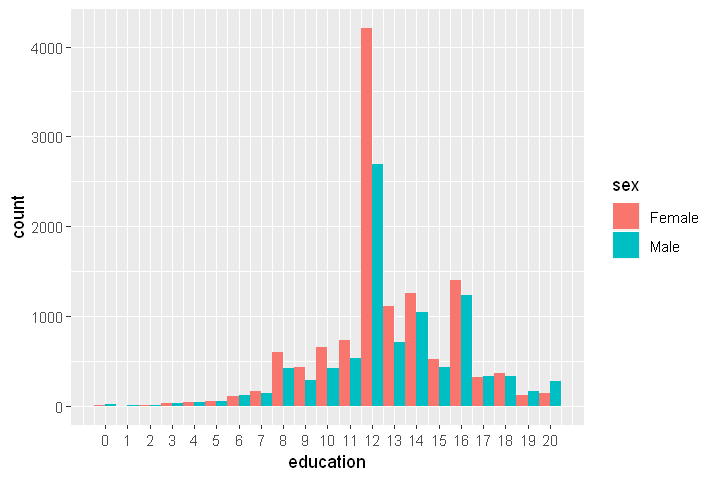

In [25]:
# Escribe aquí la solución
ggplot(vocab, aes(x=education, fill=sex)) + 
    geom_histogram(binwidth=1, position='dodge') + 
    scale_x_continuous(breaks = seq(0, 20, by = 1))


**Contestación:**

La opción más adecuada para representar este histograma es la opción 'dodge'. Mediante esta opción podemos ver las barras de ambos sexos, para cada edad, una al lado de la otra, por la que es muy sencillo comparar las frecuencias de aparición de cada edad en el DataFrame por sexo.

# Facets

Imaginemos que queremos separar un conjunto de datos por una o varias variables nominales (las *facets*) y representar los subconjuntos resultantes en gráficos adyacentes. Para realizar este tipo de gráficos **ggplot** ofrece las funciones *facet_grid* y *facet_wrap*. La función *facet_wrap* acepta como argumento el nombre de la variable por la cuál queremos separar el dataset, mientras que *facet_grid* permite especificar 2 variables. En este notebook nos centraremos en *facet_wrap*.

Anteriormente hemos representado el precio de los diamantes frente al número de Quilates, distinguiendo mediante el color distintos tipos de corte. Podemos realizar una gráfica del precio Vs Quilates separando por el tipo de corte. En este caso, como solo tenemos una variable, emplearemos la función *facet_wrap* (¡Fíjate en la virgulilla que precede a *cut*! Esta es una forma estándar en R de especificar que una variable depende de la variable *cut*):

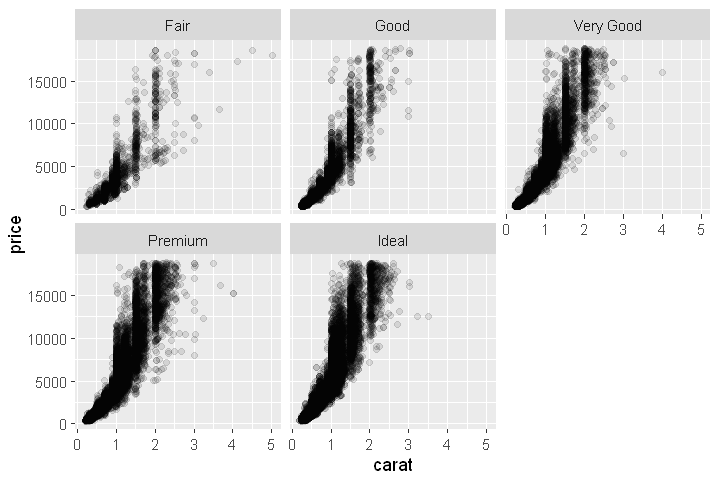

In [26]:
ggplot(diamonds, aes(x=carat,y=price)) + geom_point(alpha=0.1) + facet_wrap(~cut)

### Ejercicio 13:

**Usando el dataset meat, representa el consumo de carne a lo largo del tiempo, separando el dataset original por tipo de carne (Piensa qué formato debes emplear, *long* o *wide*). Añade a cada sub-gráfico una regresión *loess* sin intervalo de confianza.**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1068 rows containing non-finite values (stat_smooth)."

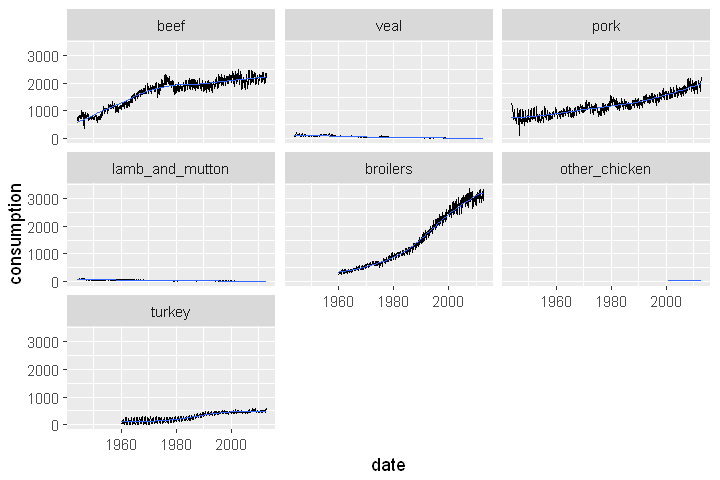

In [27]:
# Escribe aquí la solución
ggplot(meat_long, aes(x=date, y=consumption)) + geom_line() + facet_wrap(~meat_type) + geom_smooth(size=0.1, se=FALSE)


**Comentario:**

Debemos usar el formato *long* ya que de esta forma nos es muy sencillo usar la función `facet_wrap()` para representar diferentes gráficos para cada uno de los valores de la variable *meat_type*.

Por defecto, *facet_wrap* usa la misma escala para los ejes x e y. **Mejora el gráfico anterior usando el parámetro *scales***. El parámetro scales acepta los valores 'free_x', 'free_y' y 'free'. ¿Qué efecto tiene cada uno de ellos? 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1068 rows containing non-finite values (stat_smooth)."

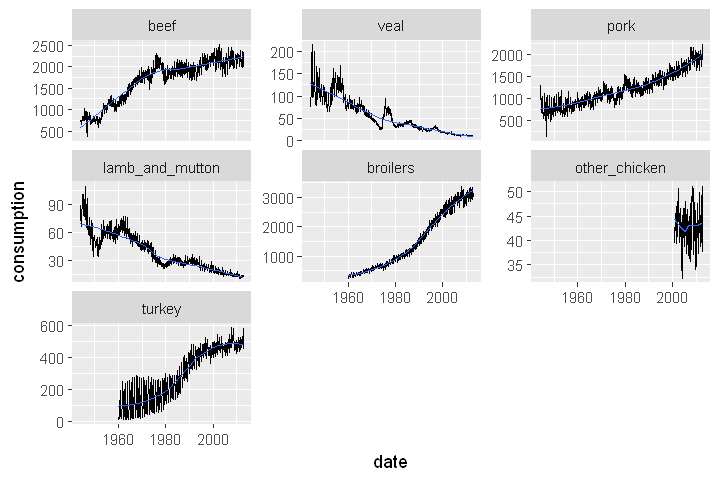

In [28]:
# Escribe aquí la solución
ggplot(meat_long, aes(x=date, y=consumption)) + 
    geom_line() + 
    facet_wrap(~meat_type, scales='free_y') + 
    geom_smooth(size=0.1, se=FALSE)


**Contestación:**

El parámetro 'free_y' hace que no sea necesario usar la misma escala para el eje y, el parámetro 'free_x' hace lo mismo pero con el eje x mientras que el parámetro 'free' hace que no sea necesario usar la misma escala para ninguno de los dos ejes. En nuestro caso lo que mejor funciona es usar el parámetro 'free_y' ya que lo que queremos es no usar la misma escala para el consumo de carne ya que varía mucho en función del tipo de carne.

# Estadísticos

**ggplot** incorpora también una capa estadística con la que es sencillo añadir representaciones de los estadísticos más comunes a nuestros gráficos. Nosotros ya hemos usado esta capa de forma implícita cuando usamos geometrías que implican cálculos estadísticos, como *geom_histogram*, *geom_smooth* o *geom_density*. Estas geometrías hacen uso de las funciones estadísticas *stat_histogram*, *stat_smooth* y *stat_density*, respectivamente (todas las funciones de la capa estadística comienzan por *stat_*. De hecho, estas dos llamadas serían idénticas: 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


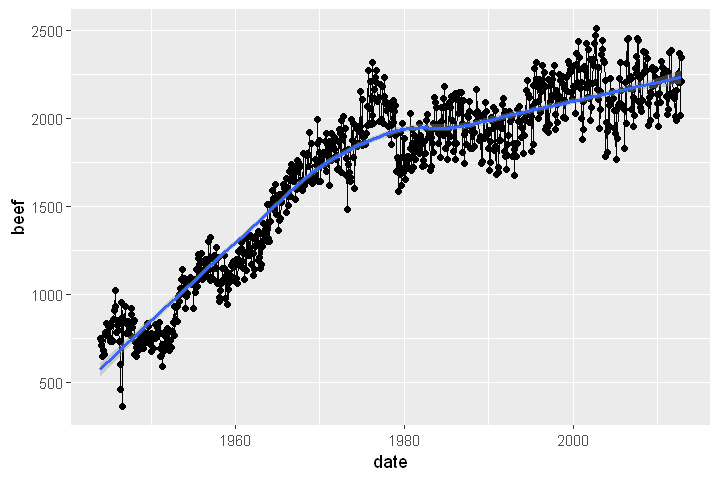

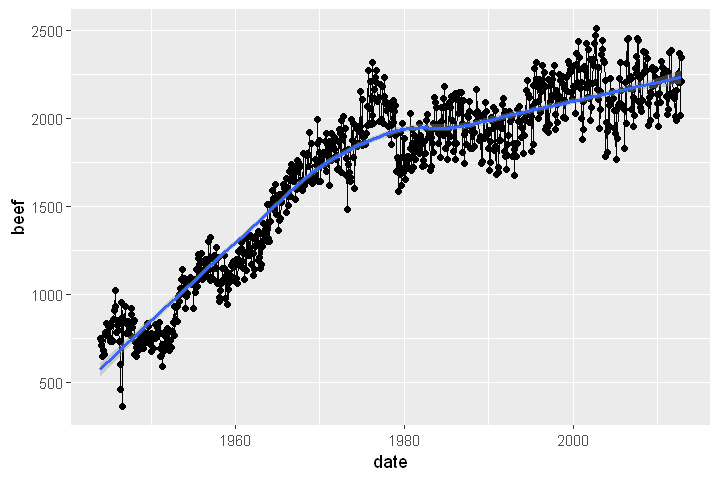

In [29]:
p = ggplot(meat, aes(x=date, y = beef)) + geom_line() + geom_point()
p + stat_smooth()
p + geom_smooth()


### Ejercicio 14:

El estadístico *geom_density* permite hacer una estimación de densidad mediante kernels [https://en.wikipedia.org/wiki/Kernel_density_estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation). **Añade al histograma normalizado del ejercicio 11 una estimación de la función de densidad. Modifica el atributo *adjust* para controlar la suavidad de la estimación. Repite esto mismo separando el dataset (usando *facets*) mediante la variable *sex*.** ¿Son las distribuciones similares?:

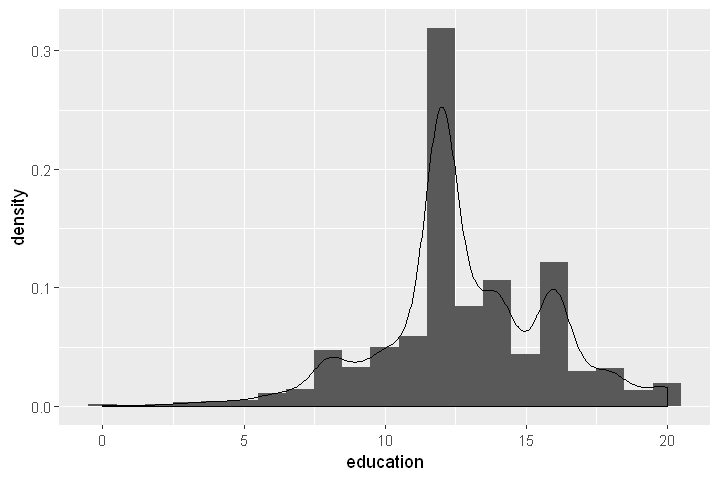

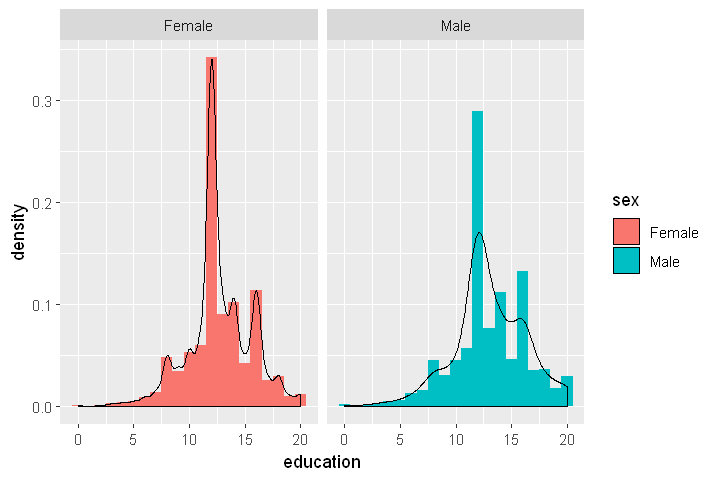

In [12]:
# Escribe aquí la solución
ggplot(vocab, aes(x=education, y=..density..)) + 
    geom_histogram(binwidth=1) + 
    geom_density(adjust=2)

# Separando usando *facets*
ggplot(vocab, aes(x=education, y=..density.., fill=sex)) + 
    geom_histogram(binwidth=1) + 
    facet_wrap(~sex) + 
    geom_density(adjust=2, alpha=0)


**Contestación:**

Cuánto mayor sea el valor para el atributo *adjust* más se suaviza la curva de la función de densidad de probabilidad mostrada.

Al representar las gráficas en función del género se puede ver como las distribuciones difieren bastante. Como se puede observar, la distribución para el género masculino presenta valores en los extremos de la distribución más altos que para el género femenino, que concentra la gran mayoría de los valores para las edades de 10 a 15 años.

Además de estadísticos directamente asociados con geometrías también existen otros funciones que nos permiten hacer un resumen estadístico de nuestros datos. Para realizar un resumen de nuestros datos emplearemos la función *stat_summary*. Esta función recibe como argumento una función (*fun.data*) con la que calcula los resumenes estadísticos de los datos.
**ggplot** nos ofrece dos funciones muy útiles para eso:

*mean_cl_normal* calcula la media y un intervalo de confianza para la misma bajo la asunción de normalidad. 
*mean_cl_boot* también calcula un intervalo de confianza para la media, pero hace uso de [*bootstraping*](https://en.wikipedia.org/wiki/Bootstrapping_%28statistics%29) para obtener el intervalo sin necesidad de asumir normalidad. 

Para este apartado generaremos unos datos aleatorios con alguna distribución estadística concreta con los que así comprobar los resultados. Por ejemplo, generaremos datos siguiendo dos distribuciones normales y agrupados en dos grupos distintos (que llamaremos 1 y 2). El siguiente código simula los datos:

In [31]:
npoints = 25

# Simulate data from a normal distribution
data1 = rnorm(npoints, mean=3, sd=1)
data2 = rnorm(npoints, mean=5, 1.5)
labels = factor(rep(c(1,2),each=npoints))
data = data.frame(value=c(data1, data2), label=labels)

head(data)


value,label
2.147480,1
3.264770,1
2.552606,1
2.047426,1
3.374661,1
3.073568,1


Dado que los datos siguen una distribución normal, para crear un gráfico con los datos y un intervalo de confianza para la media podemos proceder:

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



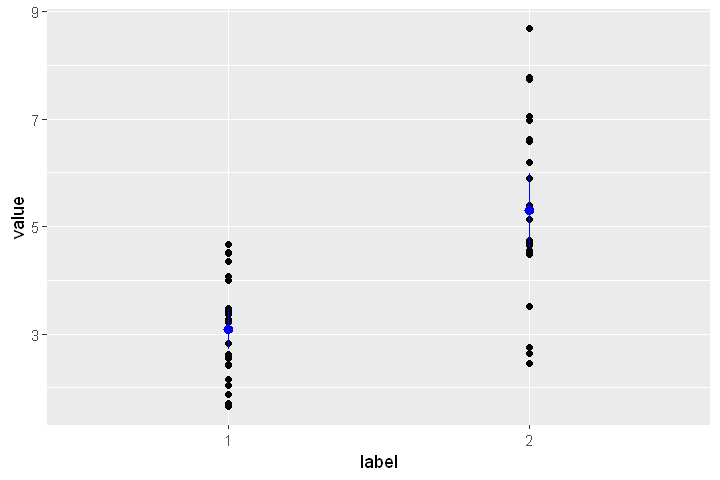

In [32]:
# Es necesario el paquete Hmisc para el cálculo de los estadísticos
library(Hmisc)

# Creamos la gráfica
ggplot(data, aes(x=label,y=value)) + geom_point() + stat_summary(fun.data = mean_cl_normal, col='blue')


Observa que, además de los estadísticos, también hemos dibujado a los propios datos en el gráfico. En general, esto es una buena práctica ya que si sólo pintamos los estadísticos resumen estamos perdiendo mucha información acerca de los datos (¿son simétricos en torno a la media?, ¿hay *outliers*?). Es de destacar que el intervalo de confianza se ha representado mediante una nueva geometría: *geom_pointrange*, que requiere como atributos estéticos *y*, *ymin* e *ymax*. Esto es importante porque, como veremos luego, podemos implementar nuestras propias funciones de resumen con la única condición de que devuelvan estas entradas.

**Contestación:**

Para la etiqueta 1 se puede ver como los datos en general si que son simétricos respecto a la media, mientras que para la etiqueta 2 hay un número mayor de datos por debajo de la meida que por encima. En ambos casos hay un número elevado de *outliers* si entendemos que los puntos que quedan fuera del intervalo de confianza lo son.

### Ejercicio 15:

**Mejora el gráfico anterior añadiendo *jitter* y cambiando el  tamaño (incrementándolo ligeramente) y color de los estadísticos (algún otro que se distinga mejor). En esta ocasión, usa *geom_jitter* (en lugar de *geom_point(position='jitter')* y modifica el nivel del ruido en los ejes x e y mediante los parámetros *width* y *height*.**

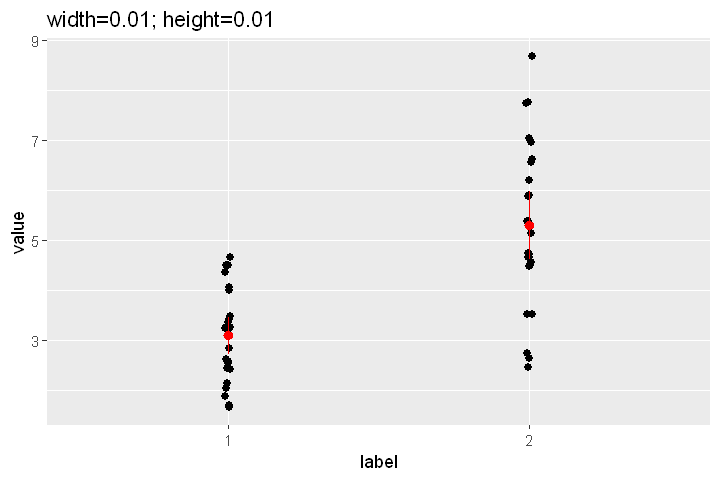

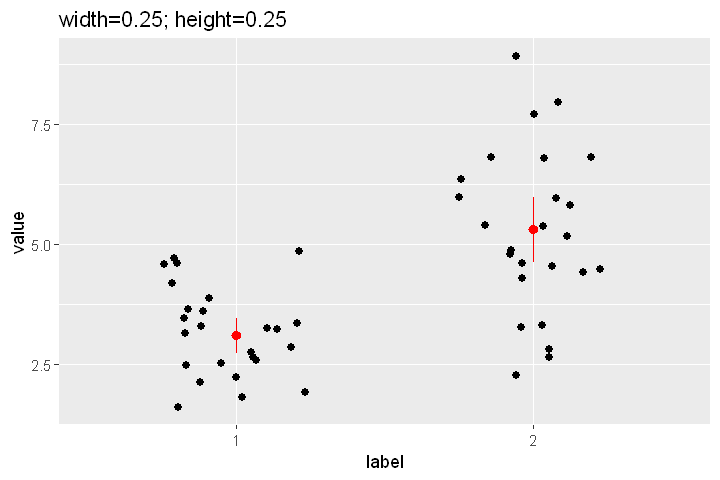

In [33]:
# Escribe aquí la solución, usa el data.frame data
ggplot(data, aes(x=label,y=value)) + 
    geom_jitter(width=0.01, height=0.01, size=2) + 
    stat_summary(fun.data = mean_cl_normal, col='red') + 
    labs(title='width=0.01; height=0.01')

ggplot(data, aes(x=label,y=value)) + 
    geom_jitter(width=0.25, height=0.25, size=2) + 
    stat_summary(fun.data = mean_cl_normal, col='red') + 
    labs(title='width=0.25; height=0.25')


**Comentario:**

Como se puede observar en las gráficas superiores cuanto mayor sea el valor asignado para *width* y para *height* mayor será el ruido que se le añade a los puntos mendiante la función `geom_jitter()`.

### Ejercicio 16:

**Usando los datos aleatorios generados abajo obtén un resumen usando *mean_cl_boot*.** 

In [34]:
npoints = 20

# simulation
# Datos no  normales!!
data1 = rchisq(npoints, df=2) 
data2 = rchisq(npoints, df=1) 
labels = factor(rep(c(1,2),each=npoints))
data = data.frame(value=c(data1, data2), label=labels)

head(data)


value,label
2.7601334,1
1.9420679,1
1.5340925,1
2.1847537,1
0.6156685,1
1.0731522,1


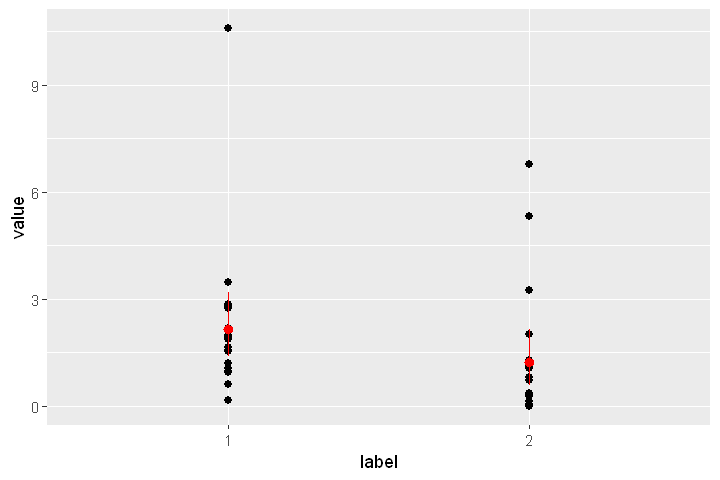

In [35]:
# Escribe aquí la solución
ggplot(data, aes(x=label,y=value)) + 
    geom_point(size=2) + 
    stat_summary(fun.data = mean_cl_boot, col='red')


Como hemos mencionado antes podemos crear nuestras propias funciones de resumen con la única condición de que reciban como argumento un vector y devuelvan un *data.frame* con las entradas *y*, *ymin* e *ymax*. En el siguiente ejemplo, se implementa una función sin mucha utilidad estadística que devuelve el mínimo, la mediana y el máximo de una serie de datos:

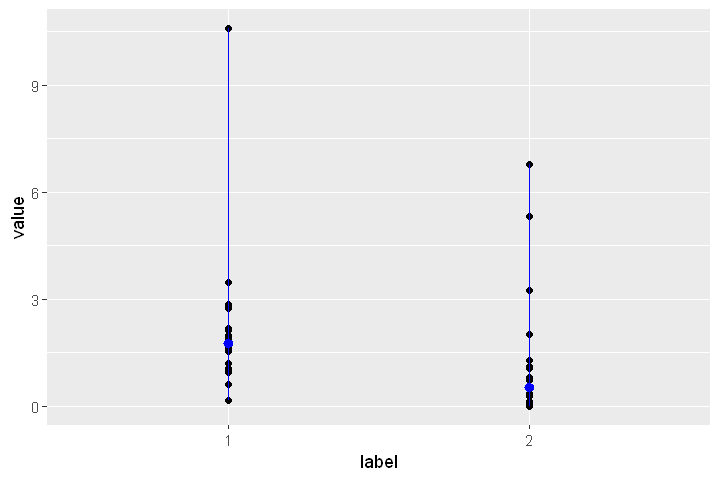

In [36]:
# Esta función no es muy útil
useless = function (series)
    data.frame('y' = median(series), 'ymin'= min(series), 'ymax' = max(series))

ggplot(data, aes(x=label,y=value)) + geom_point() + stat_summary(fun.data = useless, color="blue")


### Ejercicio 17: 

**Implementa una función que devuelva como estadísticos la mediana y los percentiles 0.10 y 0.90 (usa la función *quantile* de R). Utiliza esta función en combinación con *stat_summary* sobre los datos sintéticos anteriores. Recuerda mejorar el plot anterior añadiendo *jitter*.**

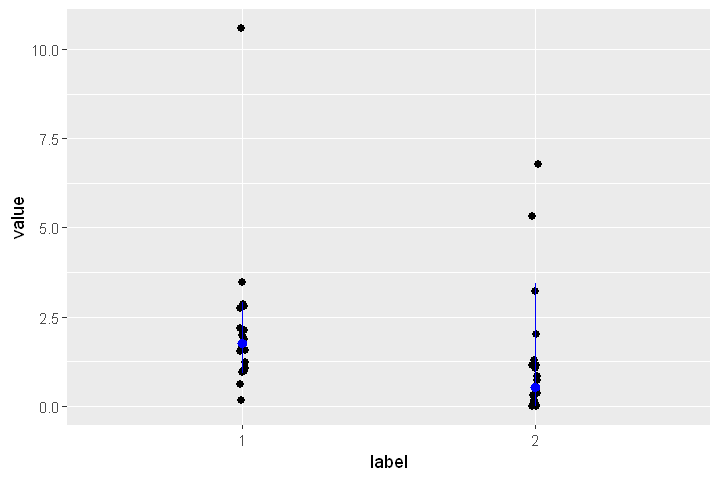

In [37]:
# Esta función no es muy útil, complétala para que lo sea
useful = function (series)
    data.frame('y' = median(series), 'ymin'= quantile(series, probs=c(0.1)), 'ymax' = quantile(series, probs=c(0.9)))

# Introduce aquí el comando ggplot
ggplot(data, aes(x=label,y=value)) + 
    geom_jitter(width=0.01, height=0.01, size=2) + 
    stat_summary(fun.data = useful, color="blue")


# Boxplots y violin-plots

Aunque nos hemos entretenido usando las funciones resumen, podríamos haber conseguido un efecto similar mediante los clásicos boxplots (*geom_boxplot*) o los [violin plots](https://en.wikipedia.org/wiki/Violin_plot) (*geom_violin*).

### Ejercicio 18:

**Usando los datos del ejercicio anterior, crea un boxplot y un violin-plot. Añade por encima de ellos los propios puntos con *jitter*.** Normalmente los boxplots suelen pintar outliers. Para evitar pintarlos dos veces (una mediante *boxplot* y otro mediante *geom_jitter*), usa *outlier.shape=NA* dentro de geom_boxplot.

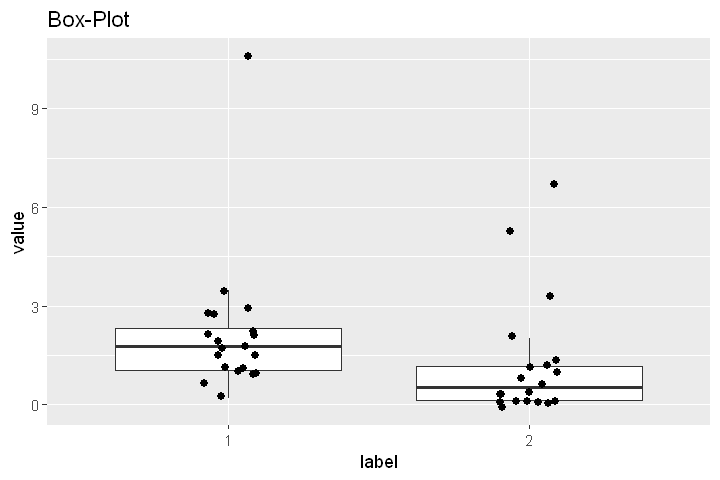

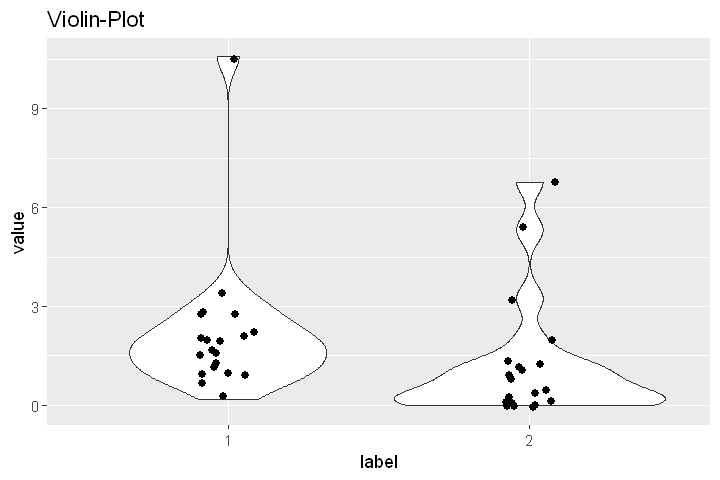

In [38]:
# Escribe aquí la solución
ggplot(data, aes(x=label,y=value)) + 
    geom_boxplot(outlier.shape=NA) + 
    geom_jitter(width=0.1, height=0.1, size=2) + 
    labs(title='Box-Plot')

ggplot(data, aes(x=label,y=value)) + 
    geom_violin() + 
    geom_jitter(width=0.1, height=0.1, size=2) + 
    labs(title='Violin-Plot')


**Comentario:**

El diagrama de violín nos sirve para ver la distribución de los datos y su densidad de probabilidad, por lo que nos aporta un poco más de información que el diagrama de cajas.

# Anotaciones y temas


Finalmente, veremos como podemos dar un título a nuestros gráficos y como podemos modificar el aspecto estético final de nuestros gráficos. Mediante los llamados **temas**, **ggplot** permite  al usuario controlar cualquier elemento del gráfico no relacionado directamente con los datos. De hecho, es posible crear y editar cualquier tema para personalizar nuestros gráficos. Para modificar el tema aplicado a un gráfico emplearemos la función *theme_xxx()* siendo *xxx* el nombre del tema. Fíjate como este diseño sigue la filosofía de construir gráficas mediante la combinación de distintas capas.

### Ejercicio 19:

**Guarda el *scatterplot* de *Vocabulary* Vs *education* (nuestra versión con *jitter* ) en una variable y luego aplícale distintos temas.** Puedes ver los temas disponibles explorando en: [https://ggplot2.tidyverse.org/reference/ggtheme.html](https://ggplot2.tidyverse.org/reference/ggtheme.html).

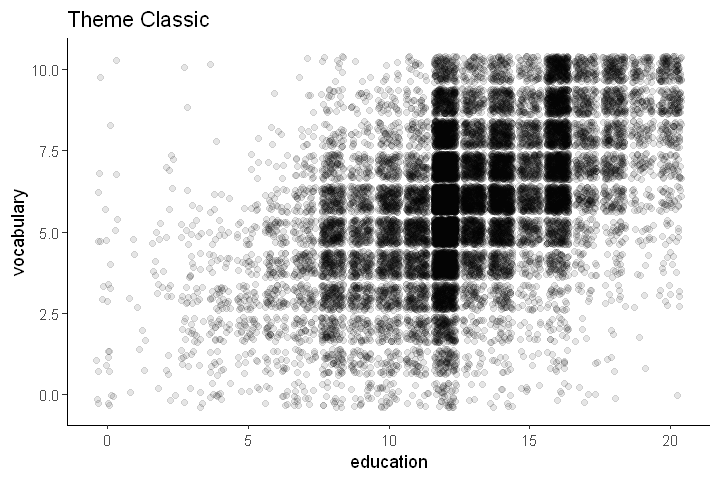

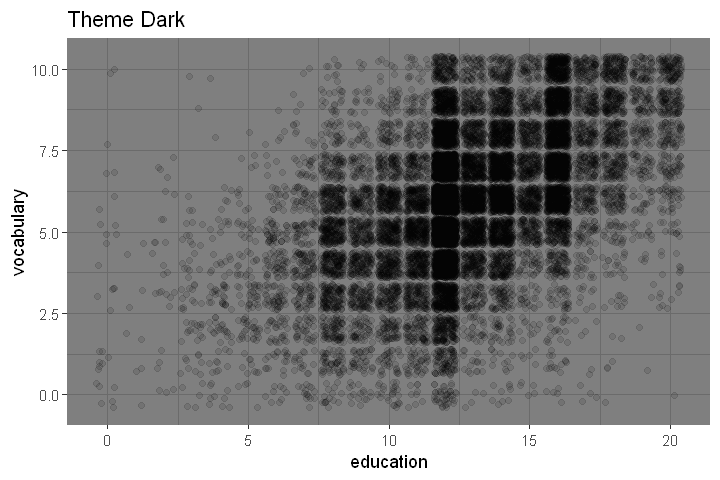

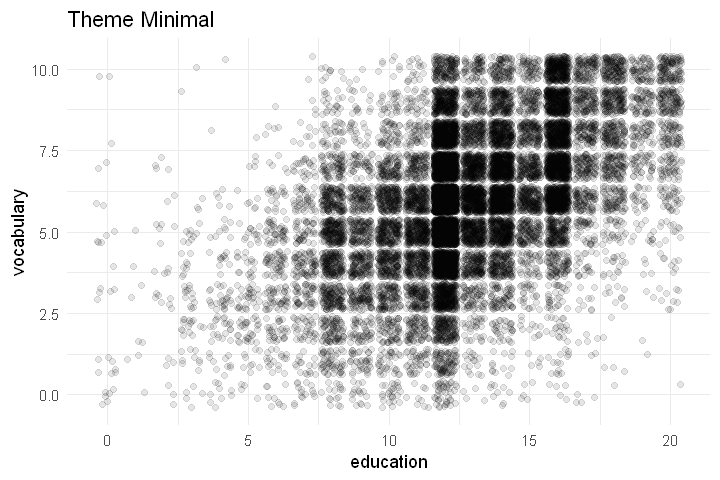

In [39]:
# Escribe aquí la solución
vocab_vs_education = ggplot(vocab, aes(x=education, y=vocabulary)) + 
                        geom_point(position='jitter', alpha=0.1)

vocab_vs_education + theme_classic() + labs(title='Theme Classic')

vocab_vs_education + theme_dark() + labs(title='Theme Dark')

vocab_vs_education + theme_minimal() + labs(title='Theme Minimal')

Finalmente, aunque **ggplot** incluye automáticamente un nombre para los ejes x e y puede ser necesario modificarlos para aclararlos o indicar las unidades de medida (¡¡Importantísimo!!). También suele ser una buena idea incluir un título que aclare qué es lo que se está representando.

![Los gráficos siempre con títulos](http://imgs.xkcd.com/comics/convincing.png)

### Ejercicio 20:

**Utiliza las funciones *xlab()*, *ylab()* y *ggtitle()* para modificar los nombres de los ejes y el título de nuestro gráfico anterior.**

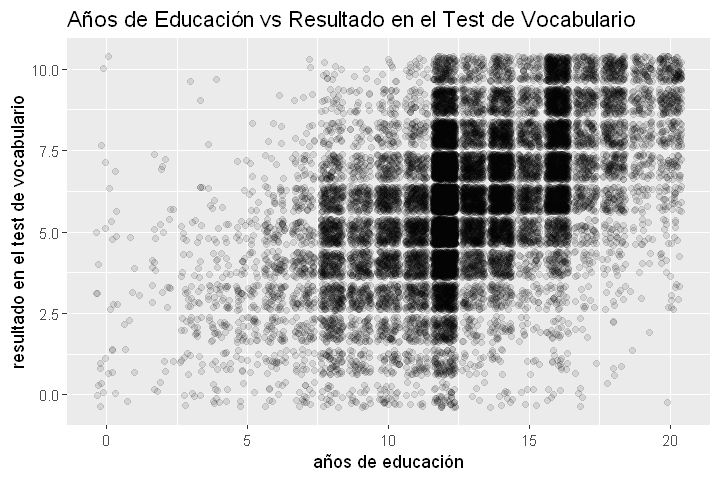

In [40]:
# Escribe aquí la solución
ggplot(vocab, aes(x=education, y=vocabulary)) + 
    geom_point(position='jitter', alpha=0.1) +
    xlab('años de educación') +
    ylab('resultado en el test de vocabulario') +
    ggtitle('Años de Educación vs Resultado en el Test de Vocabulario')

# Apéndice: R y ggplot2 en Jupyter

En una terminal de R (evita hacerlo en una consola proporcionada por cualquier IDE), instala los siguientes paquetes:

`> install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))`
`> devtools::install_github('IRkernel/IRkernel')`

Registra el kernel de R en Jupyter:

`> IRkernel::installspec()`

Finalmente, instala los paquetes necesarios para la práctica:

`> install.packages(c('ggplot2', 'Hmisc'))` 


Si trabajas con anaconda también puedes crear un nuevo *environment* para trabajar con R:

`$ conda create -n my-r-env -c r r-essentials`

Una vez creado el nuevo *environment*, recuerda instalar el paquete *Hmisc* mediante:

`$ conda install -c r r-hmisc`